
--- Summary Statistics ---
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.627417    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      1.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.0

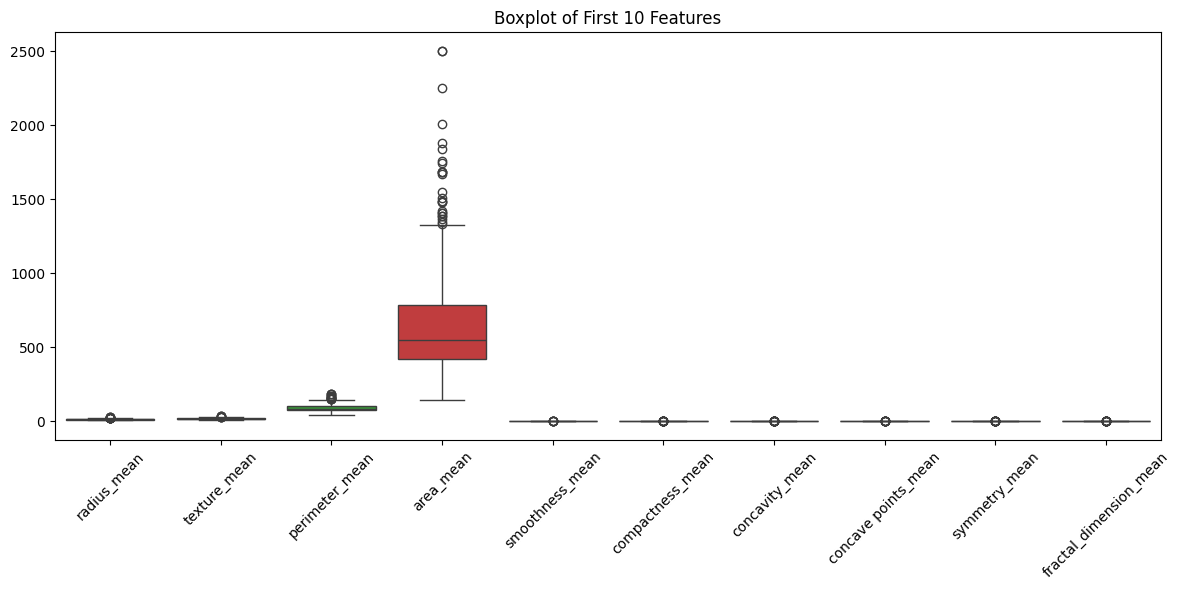

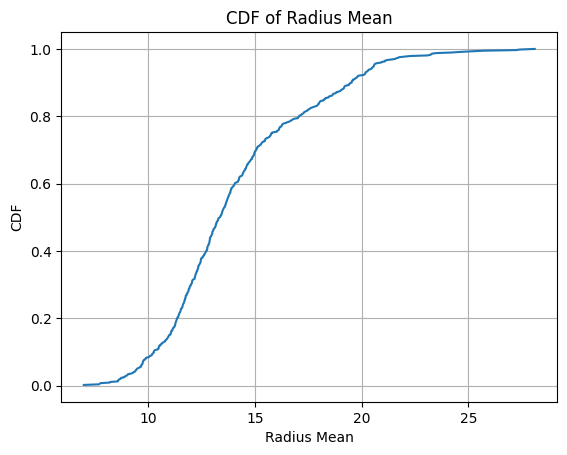

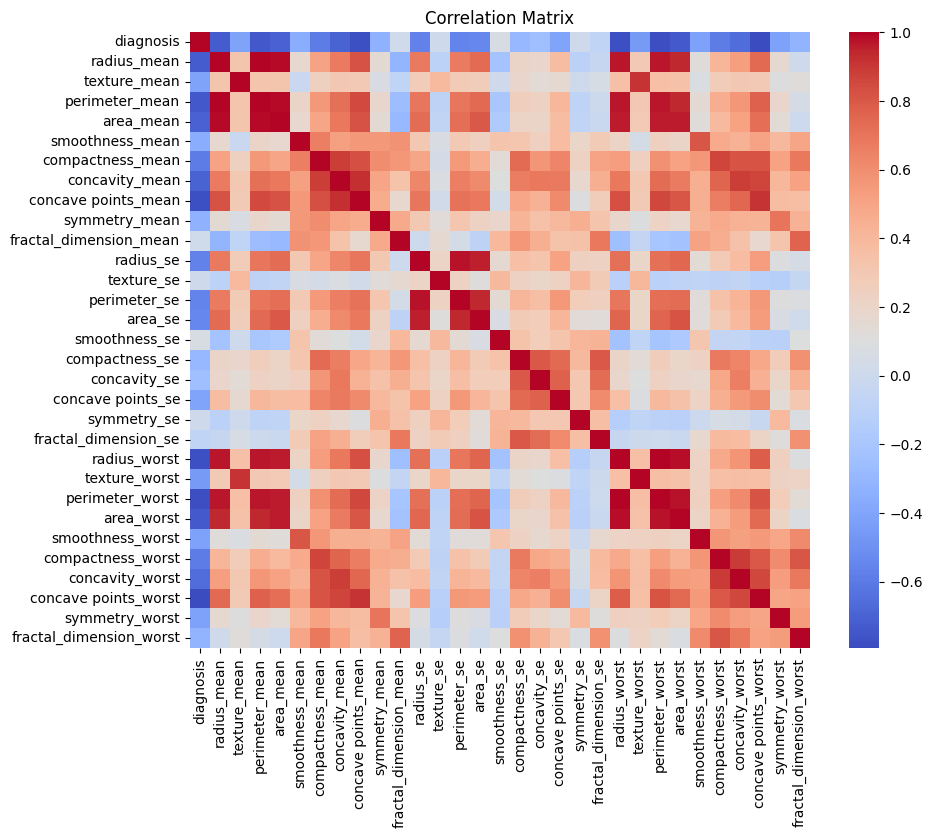


--- Covariance Matrix (First 5 Rows) ---
                 diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis         0.234177    -1.244954     -0.864145       -8.732438   
radius_mean      -1.244954    12.418920      4.907582       85.447142   
texture_mean     -0.864145     4.907582     18.498909       34.439759   
perimeter_mean   -8.732438    85.447142     34.439759      590.440480   
area_mean      -120.738222  1224.483409    485.993787     8435.772345   

                    area_mean  
diagnosis         -120.738222  
radius_mean       1224.483409  
texture_mean       485.993787  
perimeter_mean    8435.772345  
area_mean       123843.554318  

--- Pearson Correlation ---
r = 0.324, p-value = 0.0000

--- Hypothesis Testing (radius_mean) ---
t = 25.44, p = 0.0000


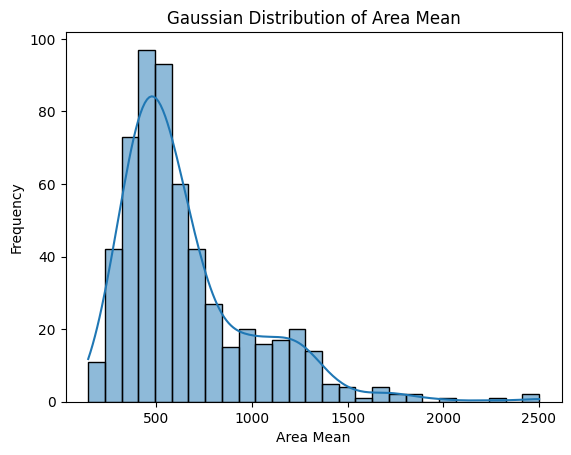


--- Z-Score Outliers (> 3) ---
diagnosis                  5
radius_mean                4
texture_mean               7
perimeter_mean             8
area_mean                  5
smoothness_mean            9
compactness_mean           9
concavity_mean             6
concave points_mean        5
symmetry_mean              7
fractal_dimension_mean     7
radius_se                  9
texture_se                 8
perimeter_se               6
area_se                    7
smoothness_se             12
compactness_se             6
concavity_se               6
concave points_se         11
symmetry_se               10
fractal_dimension_se       6
radius_worst               4
texture_worst              6
perimeter_worst           10
area_worst                 3
smoothness_worst          10
compactness_worst          7
concavity_worst            0
concave points_worst       9
symmetry_worst             9
dtype: int64


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, zscore, pearsonr
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("data.csv")
df = df.drop(columns=["id", "Unnamed: 32"])
df["diagnosis"] = df["diagnosis"].map({"M": 0, "B": 1}) 
print("\n--- Summary Statistics ---")
print(df.describe())
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\n--- Outliers (IQR method) ---")
print(outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:11])
plt.xticks(rotation=45)
plt.title("Boxplot of First 10 Features")
plt.tight_layout()
plt.show()
feature = df['radius_mean']
x = np.sort(feature)
cdf = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, cdf)
plt.title("CDF of Radius Mean")
plt.xlabel("Radius Mean")
plt.ylabel("CDF")
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
print("\n--- Covariance Matrix (First 5 Rows) ---")
print(df.cov().iloc[:5, :5])
r, p_val = pearsonr(df['radius_mean'], df['texture_mean'])
print(f"\n--- Pearson Correlation ---\nr = {r:.3f}, p-value = {p_val:.4f}")
malignant = df[df['diagnosis'] == 0]['radius_mean']
benign = df[df['diagnosis'] == 1]['radius_mean']
t_stat, p_value = ttest_ind(malignant, benign)
print(f"\n--- Hypothesis Testing (radius_mean) ---\nt = {t_stat:.2f}, p = {p_value:.4f}")
sns.histplot(df['area_mean'], kde=True)
plt.title("Gaussian Distribution of Area Mean")
plt.xlabel("Area Mean")
plt.ylabel("Frequency")
plt.show()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['diagnosis']))
z_scores = zscore(scaled_data)
z_outliers = (np.abs(z_scores) > 3).sum(axis=0)
print("\n--- Z-Score Outliers (> 3) ---")
print(pd.Series(z_outliers, index=df.columns[:-1]))
